SISTEM REKOMENDASI PEMBELIAN LAPTOP - METODE FUZZY SUGENO


######################################################################
# KASUS 1: Laptop murah dengan spesifikasi tinggi
######################################################################

METODE FUZZY SUGENO

STEP 1: FUZZIFIKASI
Input: Harga = Rp 10 juta, Spesifikasi = 75

Derajat Keanggotaan Harga:
  - Murah  : 0.1667
  - Sedang : 0.2857
  - Mahal  : 0.0000

Derajat Keanggotaan Spesifikasi:
  - Rendah : 0.0000
  - Sedang : 0.0000
  - Tinggi : 1.0000

STEP 2: INFERENSI (Rule Evaluation)
Konstanta Output Sugeno:
  - Tidak Direkomendasikan: z = 20
  - Cukup Direkomendasikan: z = 50
  - Sangat Direkomendasikan: z = 85

Rule yang Aktif:
  Rule 3: IF Harga Murah & Spec Tinggi THEN z=85 (α=0.1667)
  Rule 6: IF Harga Sedang & Spec Tinggi THEN z=85 (α=0.2857)

STEP 3: DEFUZZIFIKASI (Weighted Average)

Perhitungan Detail:
  Rule: Harga Murah & Spec Tinggi
    α = 0.1667, z = 85, α×z = 14.1667
  Rule: Harga Sedang & Spec Tinggi
   

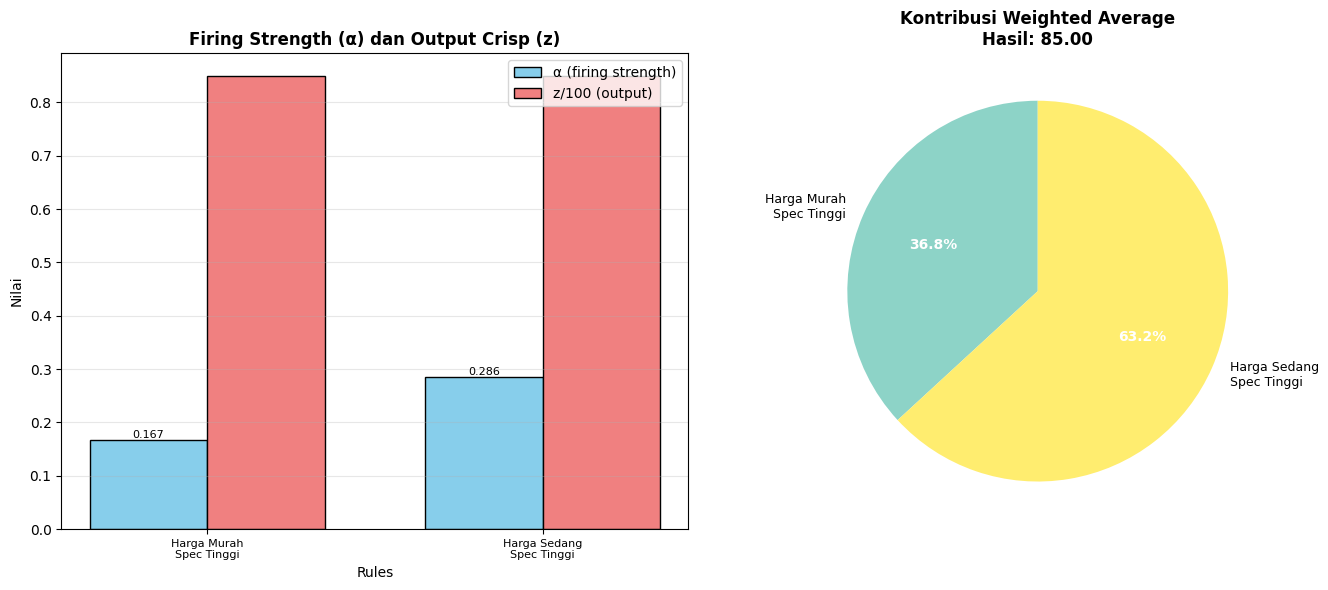



######################################################################
# KASUS 2: Laptop harga sedang dengan spesifikasi sedang
######################################################################

METODE FUZZY SUGENO

STEP 1: FUZZIFIKASI
Input: Harga = Rp 20 juta, Spesifikasi = 45

Derajat Keanggotaan Harga:
  - Murah  : 0.0000
  - Sedang : 0.2857
  - Mahal  : 0.5000

Derajat Keanggotaan Spesifikasi:
  - Rendah : 0.1000
  - Sedang : 0.7500
  - Tinggi : 0.0000

STEP 2: INFERENSI (Rule Evaluation)
Konstanta Output Sugeno:
  - Tidak Direkomendasikan: z = 20
  - Cukup Direkomendasikan: z = 50
  - Sangat Direkomendasikan: z = 85

Rule yang Aktif:
  Rule 4: IF Harga Sedang & Spec Rendah THEN z=20 (α=0.1000)
  Rule 5: IF Harga Sedang & Spec Sedang THEN z=50 (α=0.2857)
  Rule 7: IF Harga Mahal & Spec Rendah THEN z=20 (α=0.1000)
  Rule 8: IF Harga Mahal & Spec Sedang THEN z=20 (α=0.5000)

STEP 3: DEFUZZIFIKASI (Weighted Average)

Perhitungan Detail:
  Rule: Harga Sedang & Spec Rendah
    α

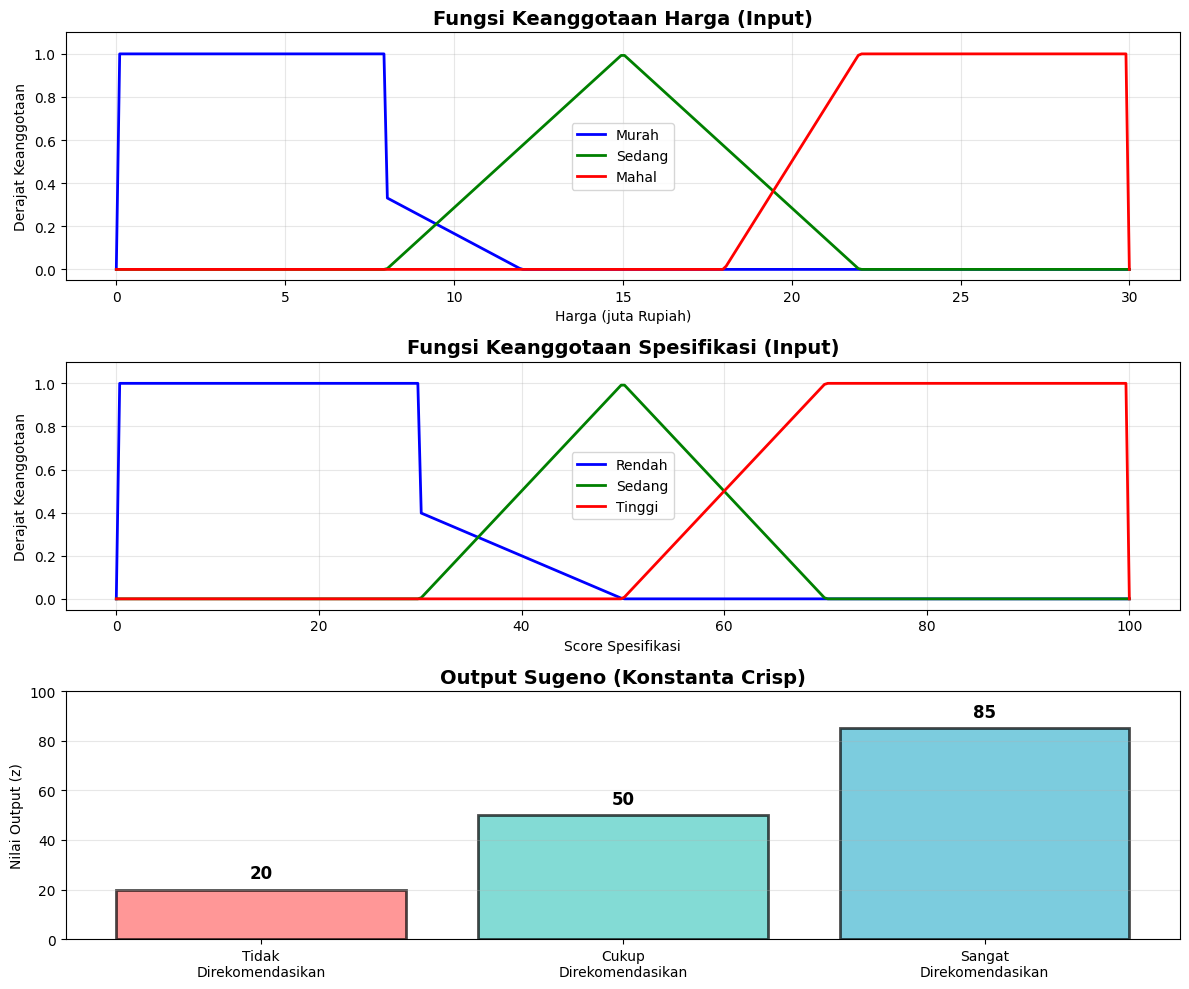


PROGRAM SELESAI


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class FuzzySugenoLaptop:
    """
    Sistem Rekomendasi Pembelian Laptop menggunakan Fuzzy Sugeno
    Input: Harga (juta rupiah), Spesifikasi Score (0-100)
    Output: Rekomendasi Pembelian (0-100)
    """

    def __init__(self):
        # Range variabel
        self.price_range = [0, 30]  # juta rupiah
        self.spec_range = [0, 100]   # score spesifikasi
        self.recommendation_range = [0, 100]  # score rekomendasi

        # Konstanta output Sugeno untuk setiap kategori
        # Sugeno menggunakan fungsi crisp (konstanta) untuk output
        self.z_values = {
            'tidak': 20,   # Tidak direkomendasikan
            'cukup': 50,   # Cukup direkomendasikan
            'sangat': 85   # Sangat direkomendasikan
        }

    # ========== FUNGSI KEANGGOTAAN ==========

    def trimf(self, x, params):
        """Triangular membership function"""
        a, b, c = params
        if x <= a or x >= c:
            return 0
        elif a < x <= b:
            return (x - a) / (b - a)
        else:
            return (c - x) / (c - b)

    def trapmf(self, x, params):
        """Trapezoidal membership function"""
        a, b, c, d = params
        if x <= a or x >= d:
            return 0
        elif a < x <= b:
            return (x - a) / (b - a)
        elif b < x <= c:
            return 1
        else:
            return (d - x) / (d - a)

    # ========== FUZZIFIKASI HARGA ==========

    def fuzzify_price(self, price):
        """Fuzzifikasi harga: Murah, Sedang, Mahal"""
        murah = self.trapmf(price, [0, 0, 8, 12])
        sedang = self.trimf(price, [8, 15, 22])
        mahal = self.trapmf(price, [18, 22, 30, 30])
        return {'murah': murah, 'sedang': sedang, 'mahal': mahal}

    # ========== FUZZIFIKASI SPESIFIKASI ==========

    def fuzzify_spec(self, spec):
        """Fuzzifikasi spesifikasi: Rendah, Sedang, Tinggi"""
        rendah = self.trapmf(spec, [0, 0, 30, 50])
        sedang = self.trimf(spec, [30, 50, 70])
        tinggi = self.trapmf(spec, [50, 70, 100, 100])
        return {'rendah': rendah, 'sedang': sedang, 'tinggi': tinggi}

    # ========== ATURAN FUZZY ==========

    def apply_rules(self, price_mf, spec_mf):
        """
        Aturan Fuzzy (9 rules):
        1. Harga Murah & Spec Rendah → Tidak Direkomendasikan (z=20)
        2. Harga Murah & Spec Sedang → Cukup Direkomendasikan (z=50)
        3. Harga Murah & Spec Tinggi → Sangat Direkomendasikan (z=85)
        4. Harga Sedang & Spec Rendah → Tidak Direkomendasikan (z=20)
        5. Harga Sedang & Spec Sedang → Cukup Direkomendasikan (z=50)
        6. Harga Sedang & Spec Tinggi → Sangat Direkomendasikan (z=85)
        7. Harga Mahal & Spec Rendah → Tidak Direkomendasikan (z=20)
        8. Harga Mahal & Spec Sedang → Tidak Direkomendasikan (z=20)
        9. Harga Mahal & Spec Tinggi → Cukup Direkomendasikan (z=50)
        """
        rules = []

        # Rule 1: Murah & Rendah → Tidak (z=20)
        alpha1 = min(price_mf['murah'], spec_mf['rendah'])
        z1 = self.z_values['tidak']
        rules.append(('tidak', alpha1, z1, 'Harga Murah & Spec Rendah'))

        # Rule 2: Murah & Sedang → Cukup (z=50)
        alpha2 = min(price_mf['murah'], spec_mf['sedang'])
        z2 = self.z_values['cukup']
        rules.append(('cukup', alpha2, z2, 'Harga Murah & Spec Sedang'))

        # Rule 3: Murah & Tinggi → Sangat (z=85)
        alpha3 = min(price_mf['murah'], spec_mf['tinggi'])
        z3 = self.z_values['sangat']
        rules.append(('sangat', alpha3, z3, 'Harga Murah & Spec Tinggi'))

        # Rule 4: Sedang & Rendah → Tidak (z=20)
        alpha4 = min(price_mf['sedang'], spec_mf['rendah'])
        z4 = self.z_values['tidak']
        rules.append(('tidak', alpha4, z4, 'Harga Sedang & Spec Rendah'))

        # Rule 5: Sedang & Sedang → Cukup (z=50)
        alpha5 = min(price_mf['sedang'], spec_mf['sedang'])
        z5 = self.z_values['cukup']
        rules.append(('cukup', alpha5, z5, 'Harga Sedang & Spec Sedang'))

        # Rule 6: Sedang & Tinggi → Sangat (z=85)
        alpha6 = min(price_mf['sedang'], spec_mf['tinggi'])
        z6 = self.z_values['sangat']
        rules.append(('sangat', alpha6, z6, 'Harga Sedang & Spec Tinggi'))

        # Rule 7: Mahal & Rendah → Tidak (z=20)
        alpha7 = min(price_mf['mahal'], spec_mf['rendah'])
        z7 = self.z_values['tidak']
        rules.append(('tidak', alpha7, z7, 'Harga Mahal & Spec Rendah'))

        # Rule 8: Mahal & Sedang → Tidak (z=20)
        alpha8 = min(price_mf['mahal'], spec_mf['sedang'])
        z8 = self.z_values['tidak']
        rules.append(('tidak', alpha8, z8, 'Harga Mahal & Spec Sedang'))

        # Rule 9: Mahal & Tinggi → Cukup (z=50)
        alpha9 = min(price_mf['mahal'], spec_mf['tinggi'])
        z9 = self.z_values['cukup']
        rules.append(('cukup', alpha9, z9, 'Harga Mahal & Spec Tinggi'))

        return rules

    # ========== METODE SUGENO ==========

    def sugeno_defuzzify(self, rules):
        """
        Defuzzifikasi menggunakan metode Sugeno (Weighted Average)
        Formula: Z* = (Σ αi × zi) / (Σ αi)

        αi = firing strength (derajat keanggotaan) dari rule ke-i
        zi = nilai output crisp dari rule ke-i
        """
        numerator = 0    # Σ αi × zi
        denominator = 0  # Σ αi

        calculation_details = []

        for category, alpha, z, desc in rules:
            if alpha > 0:  # Hanya proses rule yang aktif
                weighted_value = alpha * z
                numerator += weighted_value
                denominator += alpha
                calculation_details.append({
                    'rule': desc,
                    'alpha': alpha,
                    'z': z,
                    'weighted': weighted_value
                })

        if denominator == 0:
            return 0, calculation_details

        result = numerator / denominator
        return result, calculation_details

    # ========== FUNGSI UTAMA ==========

    def evaluate(self, price, spec):
        """
        Evaluasi sistem fuzzy Sugeno
        price: harga laptop (juta rupiah)
        spec: score spesifikasi (0-100)
        """
        print(f"\n{'='*70}")
        print(f"METODE FUZZY SUGENO")
        print(f"{'='*70}")

        # Step 1: Fuzzifikasi
        print(f"\nSTEP 1: FUZZIFIKASI")
        print(f"Input: Harga = Rp {price} juta, Spesifikasi = {spec}")

        price_mf = self.fuzzify_price(price)
        spec_mf = self.fuzzify_spec(spec)

        print(f"\nDerajat Keanggotaan Harga:")
        print(f"  - Murah  : {price_mf['murah']:.4f}")
        print(f"  - Sedang : {price_mf['sedang']:.4f}")
        print(f"  - Mahal  : {price_mf['mahal']:.4f}")

        print(f"\nDerajat Keanggotaan Spesifikasi:")
        print(f"  - Rendah : {spec_mf['rendah']:.4f}")
        print(f"  - Sedang : {spec_mf['sedang']:.4f}")
        print(f"  - Tinggi : {spec_mf['tinggi']:.4f}")

        # Step 2: Aplikasi aturan (Inference)
        print(f"\nSTEP 2: INFERENSI (Rule Evaluation)")
        rules = self.apply_rules(price_mf, spec_mf)

        print(f"Konstanta Output Sugeno:")
        print(f"  - Tidak Direkomendasikan: z = {self.z_values['tidak']}")
        print(f"  - Cukup Direkomendasikan: z = {self.z_values['cukup']}")
        print(f"  - Sangat Direkomendasikan: z = {self.z_values['sangat']}")
        print(f"\nRule yang Aktif:")

        for idx, (cat, alpha, z, desc) in enumerate(rules, 1):
            if alpha > 0:
                print(f"  Rule {idx}: IF {desc} THEN z={z} (α={alpha:.4f})")

        # Step 3: Defuzzifikasi
        print(f"\nSTEP 3: DEFUZZIFIKASI (Weighted Average)")
        result, calc_details = self.sugeno_defuzzify(rules)

        print(f"\nPerhitungan Detail:")
        numerator_sum = 0
        denominator_sum = 0

        for detail in calc_details:
            print(f"  Rule: {detail['rule']}")
            print(f"    α = {detail['alpha']:.4f}, z = {detail['z']}, α×z = {detail['weighted']:.4f}")
            numerator_sum += detail['weighted']
            denominator_sum += detail['alpha']

        print(f"\n  Σ(α × z) = {numerator_sum:.4f}")
        print(f"  Σ(α)     = {denominator_sum:.4f}")
        print(f"  Z*       = {numerator_sum:.4f} / {denominator_sum:.4f} = {result:.4f}")

        # Interpretasi
        if result < 40:
            interpretasi = "TIDAK DIREKOMENDASIKAN"
            emoji = "❌"
        elif result < 70:
            interpretasi = "CUKUP DIREKOMENDASIKAN"
            emoji = "✓"
        else:
            interpretasi = "SANGAT DIREKOMENDASIKAN"
            emoji = "✓✓"

        print(f"\n{'='*70}")
        print(f"HASIL AKHIR: {result:.2f}/100 → {interpretasi} {emoji}")
        print(f"{'='*70}")

        return result, price_mf, spec_mf, rules, calc_details

    # ========== VISUALISASI ==========

    def plot_membership_functions(self):
        """Plot fungsi keanggotaan"""
        fig, axes = plt.subplots(3, 1, figsize=(12, 10))

        # Harga
        x_price = np.linspace(0, 30, 300)
        murah = [self.trapmf(x, [0, 0, 8, 12]) for x in x_price]
        sedang = [self.trimf(x, [8, 15, 22]) for x in x_price]
        mahal = [self.trapmf(x, [18, 22, 30, 30]) for x in x_price]

        axes[0].plot(x_price, murah, 'b-', label='Murah', linewidth=2)
        axes[0].plot(x_price, sedang, 'g-', label='Sedang', linewidth=2)
        axes[0].plot(x_price, mahal, 'r-', label='Mahal', linewidth=2)
        axes[0].set_title('Fungsi Keanggotaan Harga (Input)', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Harga (juta Rupiah)')
        axes[0].set_ylabel('Derajat Keanggotaan')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        axes[0].set_ylim([-0.05, 1.1])

        # Spesifikasi
        x_spec = np.linspace(0, 100, 300)
        rendah = [self.trapmf(x, [0, 0, 30, 50]) for x in x_spec]
        sedang = [self.trimf(x, [30, 50, 70]) for x in x_spec]
        tinggi = [self.trapmf(x, [50, 70, 100, 100]) for x in x_spec]

        axes[1].plot(x_spec, rendah, 'b-', label='Rendah', linewidth=2)
        axes[1].plot(x_spec, sedang, 'g-', label='Sedang', linewidth=2)
        axes[1].plot(x_spec, tinggi, 'r-', label='Tinggi', linewidth=2)
        axes[1].set_title('Fungsi Keanggotaan Spesifikasi (Input)', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Score Spesifikasi')
        axes[1].set_ylabel('Derajat Keanggotaan')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        axes[1].set_ylim([-0.05, 1.1])

        # Output Sugeno (Konstanta)
        categories = ['Tidak\nDirekomendasikan', 'Cukup\nDirekomendasikan', 'Sangat\nDirekomendasikan']
        values = [self.z_values['tidak'], self.z_values['cukup'], self.z_values['sangat']]
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

        axes[2].bar(categories, values, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
        axes[2].set_title('Output Sugeno (Konstanta Crisp)', fontsize=14, fontweight='bold')
        axes[2].set_ylabel('Nilai Output (z)')
        axes[2].set_ylim([0, 100])
        axes[2].grid(True, alpha=0.3, axis='y')

        for i, v in enumerate(values):
            axes[2].text(i, v + 3, str(v), ha='center', va='bottom', fontweight='bold', fontsize=12)

        plt.tight_layout()
        plt.savefig('membership_functions_sugeno.png', dpi=300, bbox_inches='tight')
        plt.show()

    def plot_weighted_average(self, calc_details, result):
        """Visualisasi proses Weighted Average Sugeno"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Plot 1: Bar chart alpha dan z
        rules = [d['rule'].split('&')[0].strip() + '\n' + d['rule'].split('&')[1].strip() for d in calc_details]
        alphas = [d['alpha'] for d in calc_details]
        z_values = [d['z'] for d in calc_details]

        x = np.arange(len(rules))
        width = 0.35

        bars1 = ax1.bar(x - width/2, alphas, width, label='α (firing strength)', color='skyblue', edgecolor='black')
        bars2 = ax1.bar(x + width/2, [z/100 for z in z_values], width, label='z/100 (output)', color='lightcoral', edgecolor='black')

        ax1.set_xlabel('Rules')
        ax1.set_ylabel('Nilai')
        ax1.set_title('Firing Strength (α) dan Output Crisp (z)', fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels(rules, fontsize=8)
        ax1.legend()
        ax1.grid(True, alpha=0.3, axis='y')

        # Tambahkan nilai di atas bar
        for bar in bars1:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=8)

        # Plot 2: Weighted contribution
        weighted = [d['weighted'] for d in calc_details]
        colors = plt.cm.Set3(np.linspace(0, 1, len(rules)))

        wedges, texts, autotexts = ax2.pie(weighted, labels=rules, autopct='%1.1f%%',
                                             colors=colors, startangle=90)

        ax2.set_title(f'Kontribusi Weighted Average\nHasil: {result:.2f}', fontweight='bold')

        # Perbesar font
        for text in texts:
            text.set_fontsize(9)
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')

        plt.tight_layout()
        plt.savefig('weighted_average_sugeno.png', dpi=300, bbox_inches='tight')
        plt.show()


# ========== CONTOH PENGGUNAAN ==========

if __name__ == "__main__":
    # Inisialisasi sistem
    fuzzy_sugeno = FuzzySugenoLaptop()

    print("="*70)
    print("SISTEM REKOMENDASI PEMBELIAN LAPTOP - METODE FUZZY SUGENO")
    print("="*70)

    # Contoh kasus
    test_cases = [
        {"harga": 10, "spesifikasi": 75, "deskripsi": "Laptop murah dengan spesifikasi tinggi"},
        {"harga": 20, "spesifikasi": 45, "deskripsi": "Laptop harga sedang dengan spesifikasi sedang"},
        {"harga": 25, "spesifikasi": 35, "deskripsi": "Laptop mahal dengan spesifikasi rendah"},
    ]

    results = []
    for i, case in enumerate(test_cases, 1):
        print(f"\n\n{'#'*70}")
        print(f"# KASUS {i}: {case['deskripsi']}")
        print(f"{'#'*70}")

        result, price_mf, spec_mf, rules, calc_details = fuzzy_sugeno.evaluate(
            case['harga'], case['spesifikasi']
        )
        results.append(result)

        # Visualisasi weighted average untuk kasus pertama
        if i == 1 and calc_details:
            print("\nMenampilkan visualisasi weighted average...")
            fuzzy_sugeno.plot_weighted_average(calc_details, result)

    # Visualisasi fungsi keanggotaan
    print("\n\nMenampilkan visualisasi fungsi keanggotaan...")
    fuzzy_sugeno.plot_membership_functions()

    print("\n" + "="*70)
    print("PROGRAM SELESAI")
    print("="*70)